# Ritz approximation and dissipative barrier methods for a Sturm-Liouville operator

In this notebook we will aim to compare a dissipative barrier method against the high-accuracy
eigenvalue calculation method outlined in [1] for finding the eigenvalues of the
Sturm-Liouville operator

$$Ly = -y'' + Q(x)y$$

where $Q(x) = \sin(x) - \frac{40}{1+x^2}$.

[1] Aceto, Ghelardoni & Marletta (2006) Numerical computation of eigenvalues in spectral gaps of Sturm–Liouville operators, Journal of Computational and Applied Mathematics

In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return np.sin(x) - 40/(1+x**2)

In [4]:
sl_spec = dict()
sl_spec_dbm = dict()

for i in tqdm(range(50, 375, 25)):
    sl_spec[i] = sturm_liouville_bdd(potential, 70 * np.pi, i, 321, (np.pi/8, np.pi/2))
    sl_spec_dbm[i] = sturm_liouville_bdd(potential, 70 * np.pi, i, 321, (np.pi/8, np.pi/2), dbm=True)

100%|██████████| 13/13 [54:58<00:00, 253.72s/it]


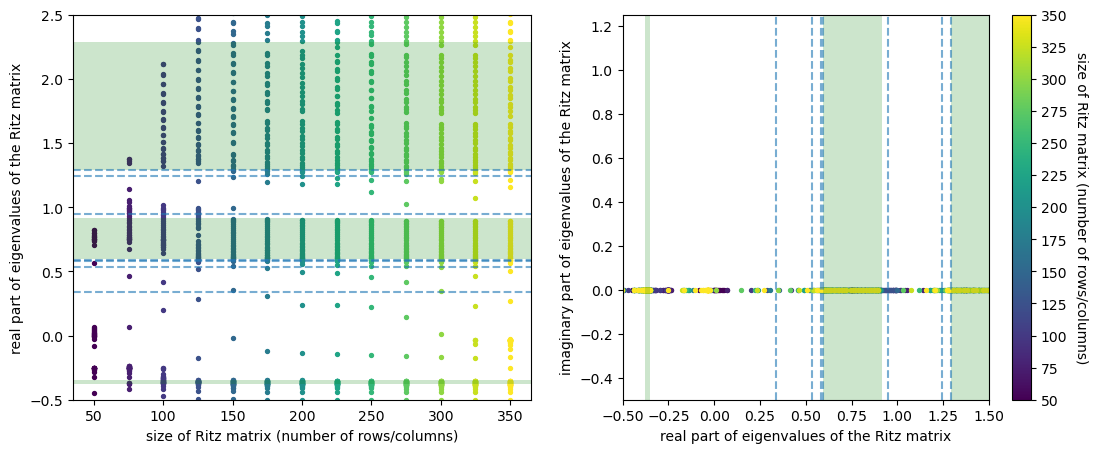

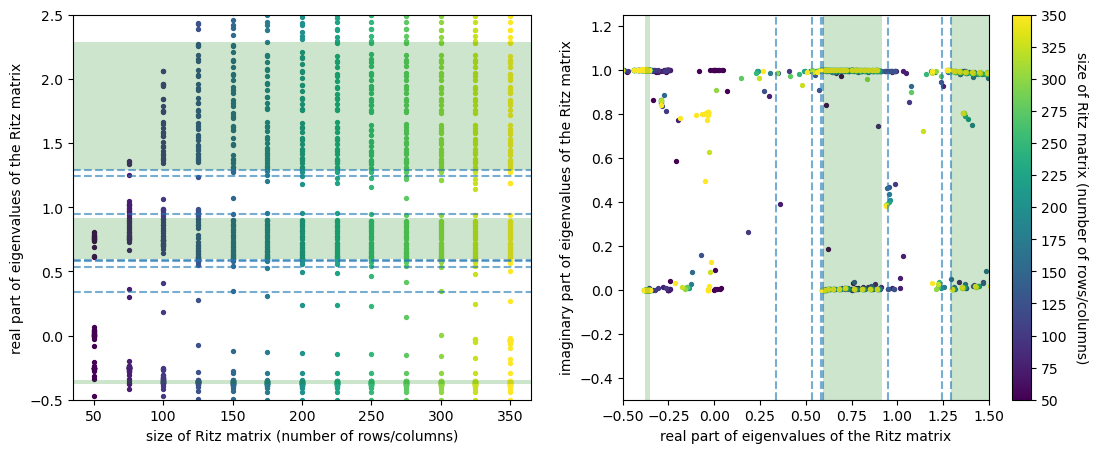

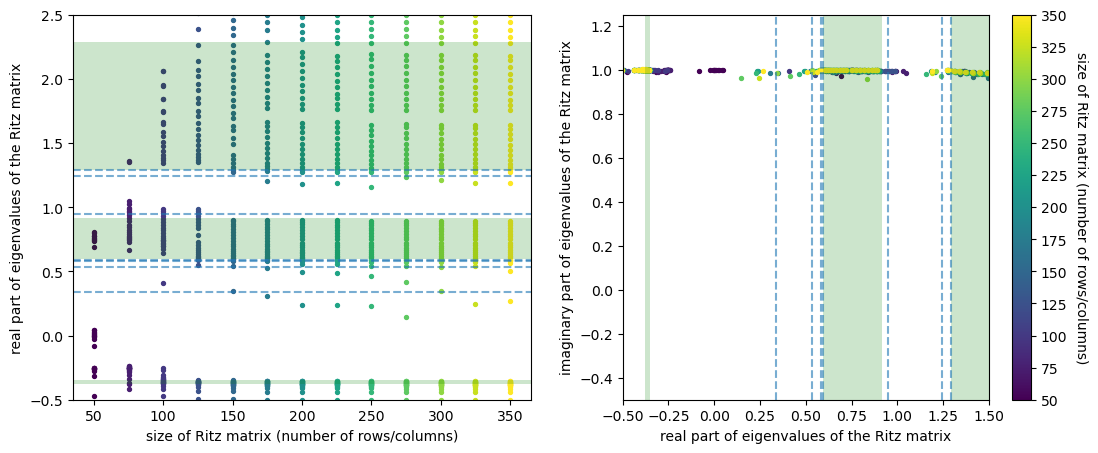

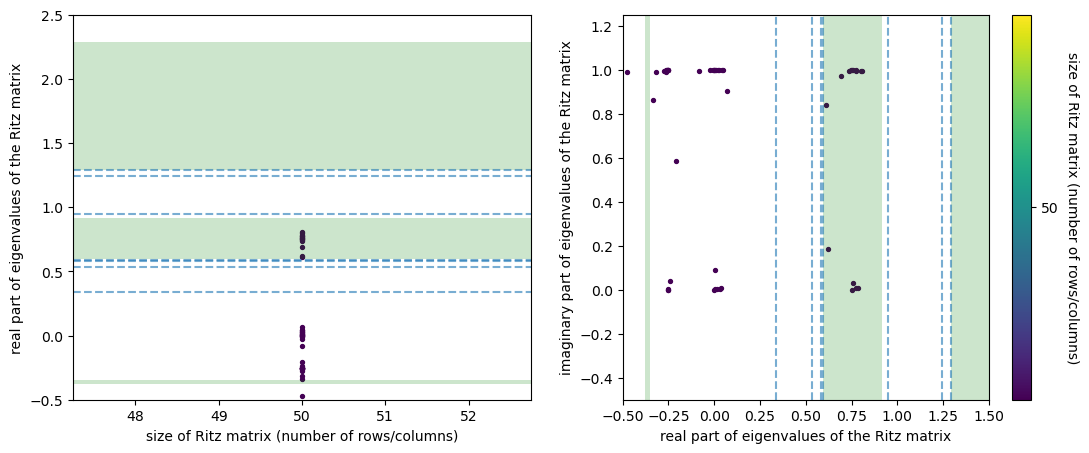

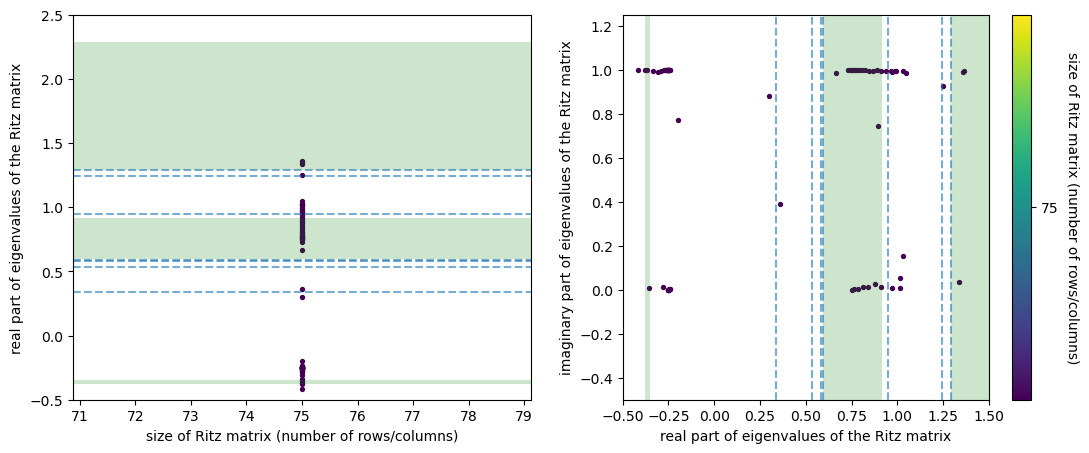

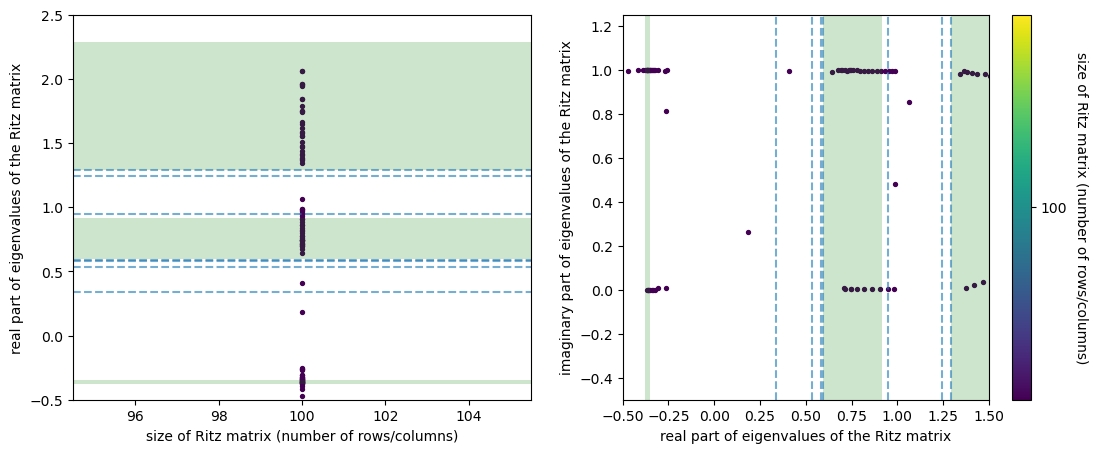

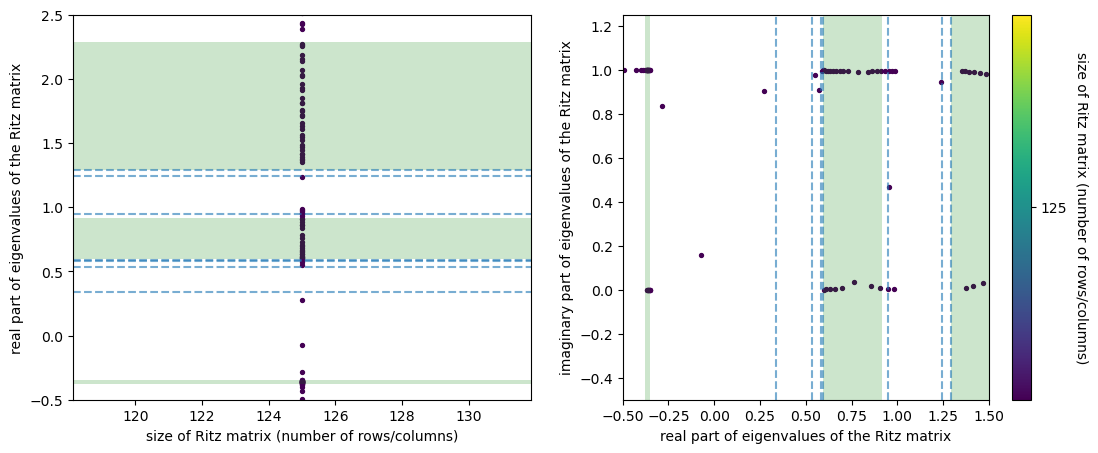

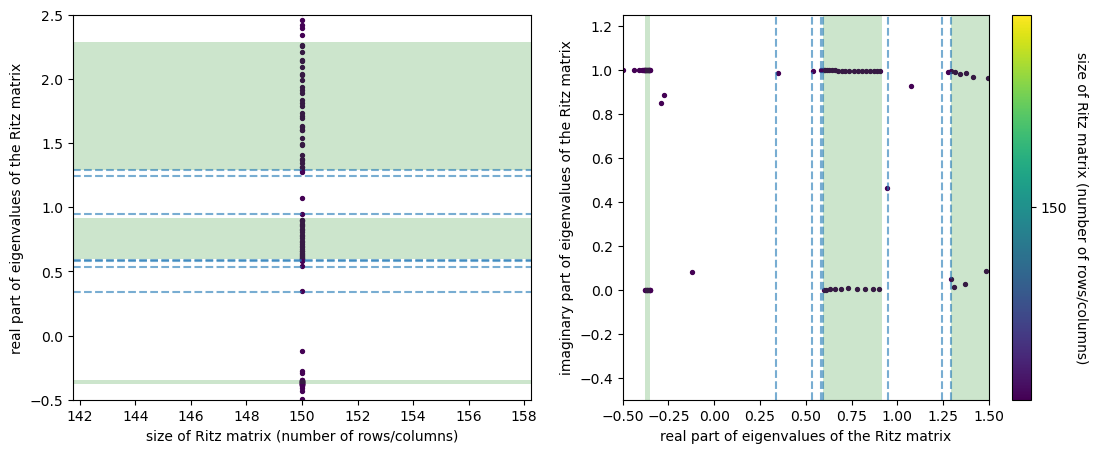

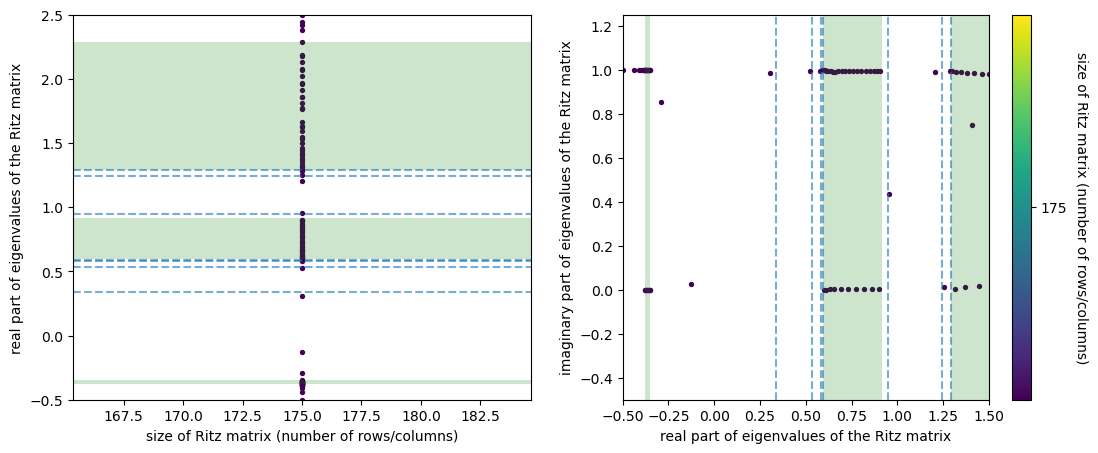

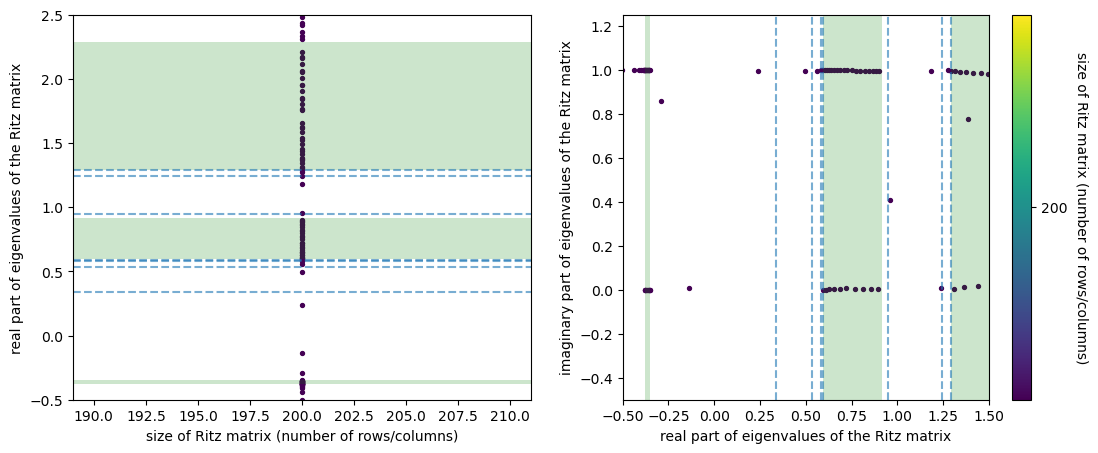

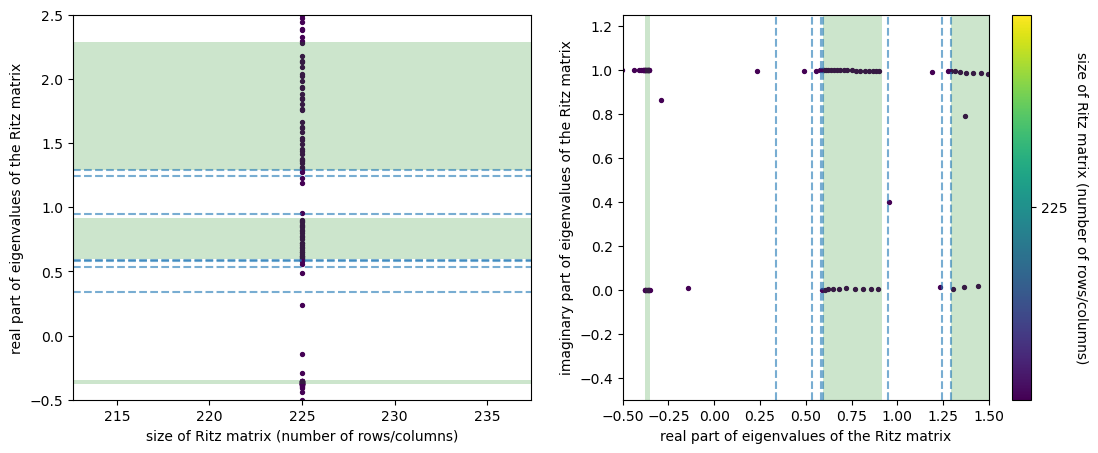

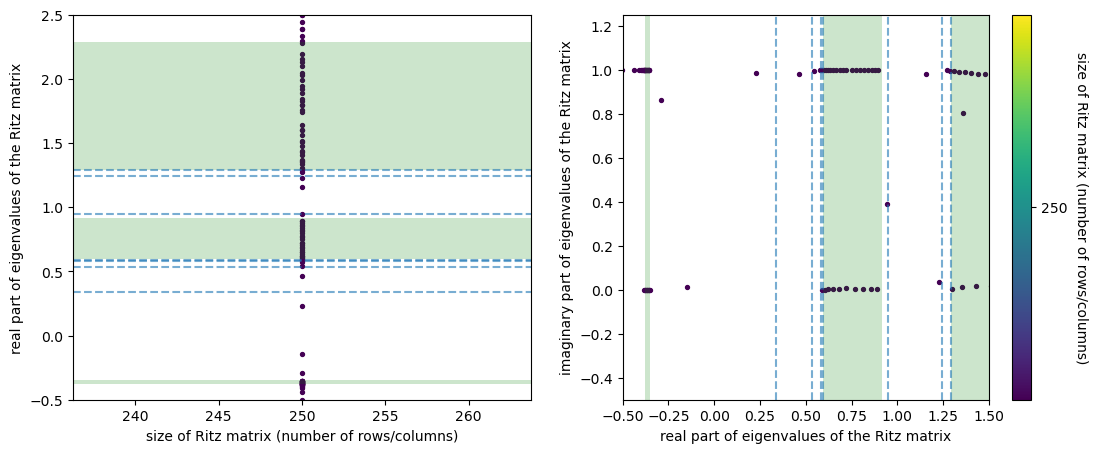

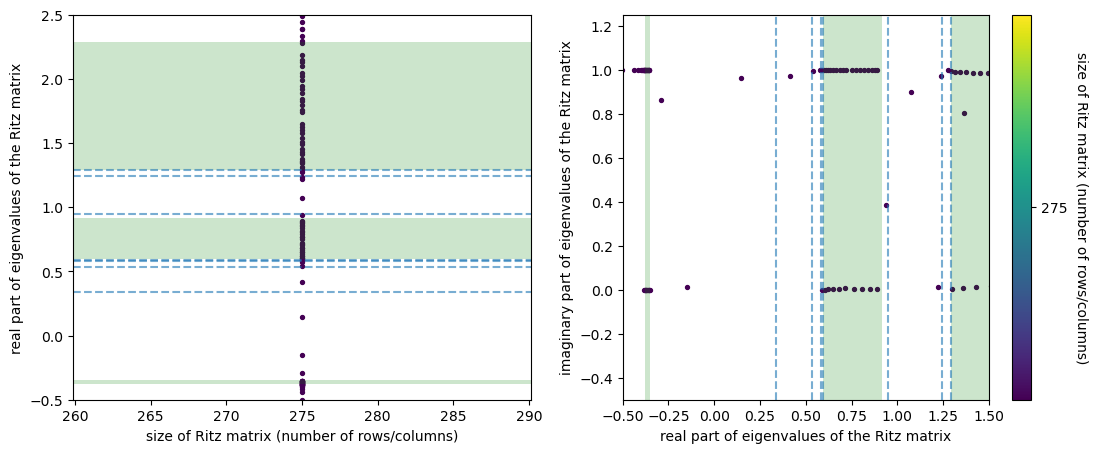

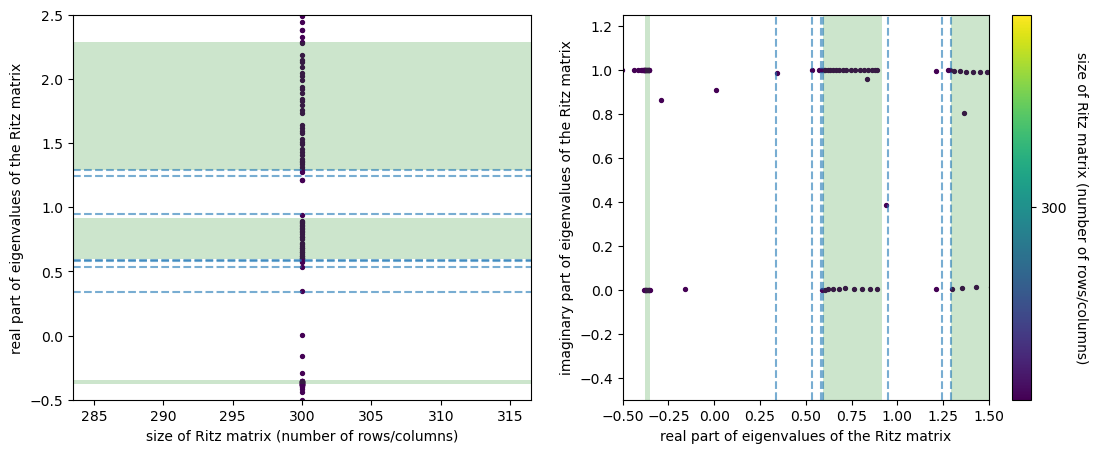

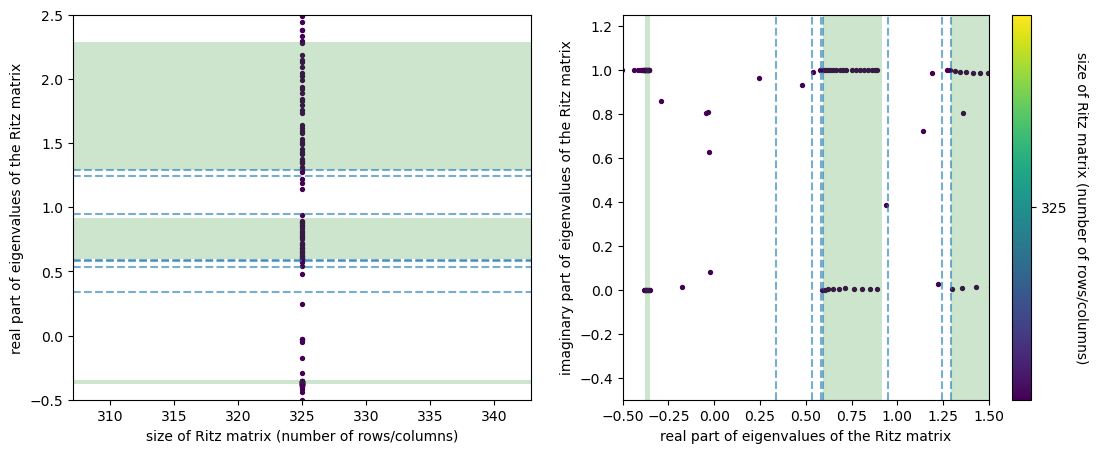

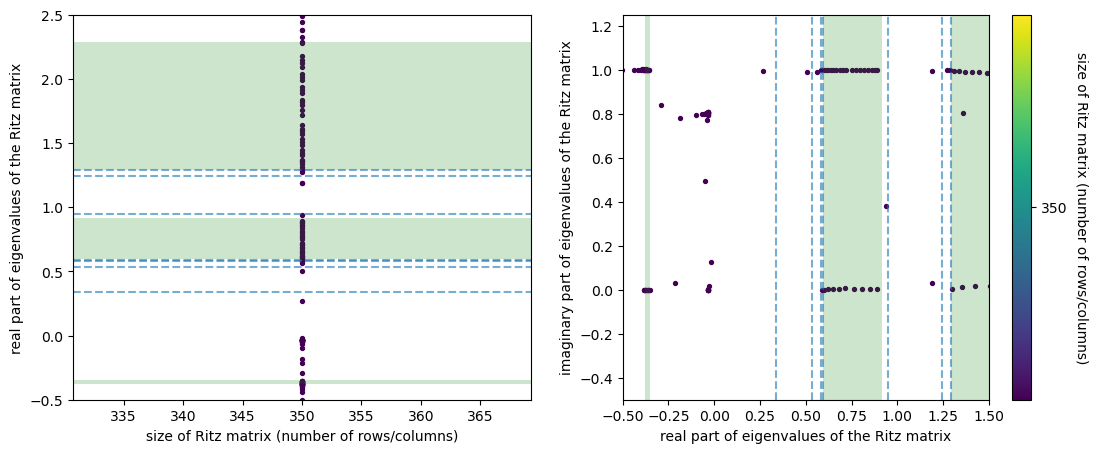

In [5]:
plot(sl_spec)
plot(sl_spec_dbm)
plot(sl_spec_dbm, dbm=0.95)
for i in sl_spec_dbm:
    plot({i: sl_spec_dbm[i]})

In [4]:
rusl = dict()
for i in tqdm(range(50, 400, 50)):
    rusl[i] = sturm_liouville_halfline(potential, i, 250, np.pi/8)

  0%|          | 0/7 [00:00<?, ?it/s]

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:98: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")
100%|██████████| 7/7 [36:39<00:00, 314.24s/it]


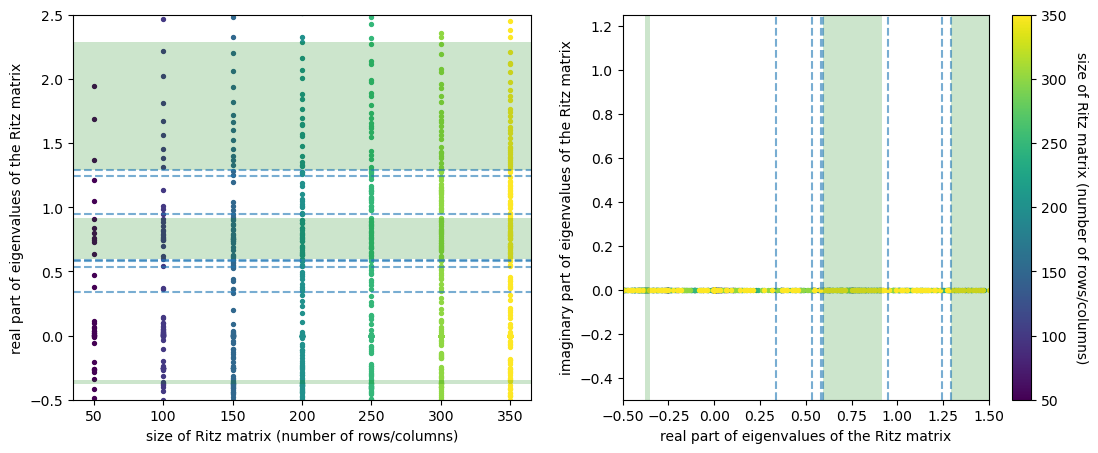

In [5]:
plot(rusl)

In [4]:
rusl_dbm = {}
for i in tqdm(range(50, 275, 50)):
    rusl_dbm[i] = sturm_liouville_halfline(potential, i, 250, alpha=np.pi/8, dbm=True)

  0%|          | 0/5 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:98: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")
100%|██████████| 5/5 [21:58<00:00, 263.64s/it]


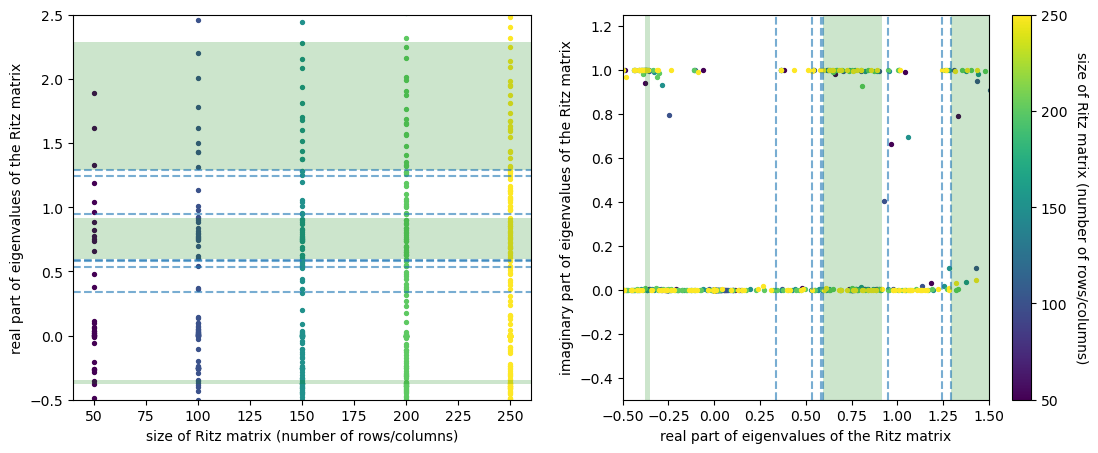

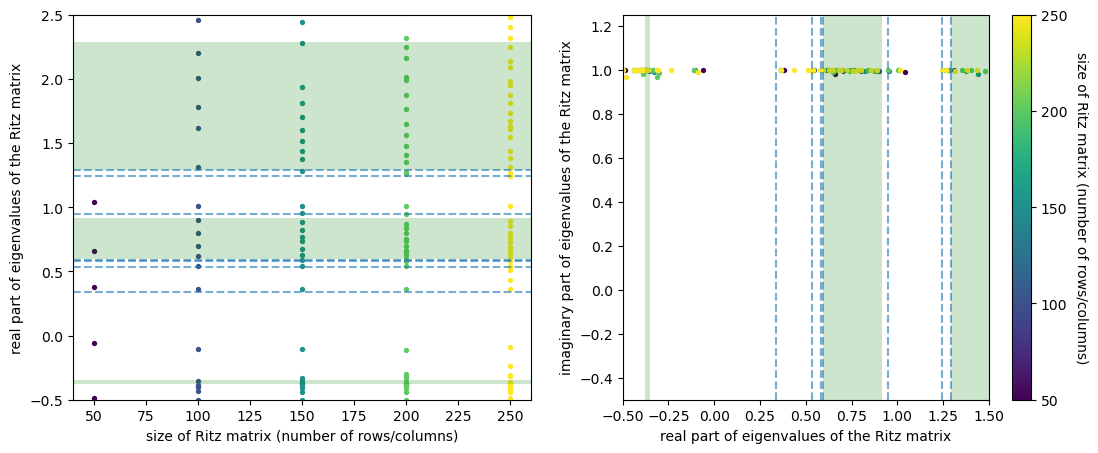

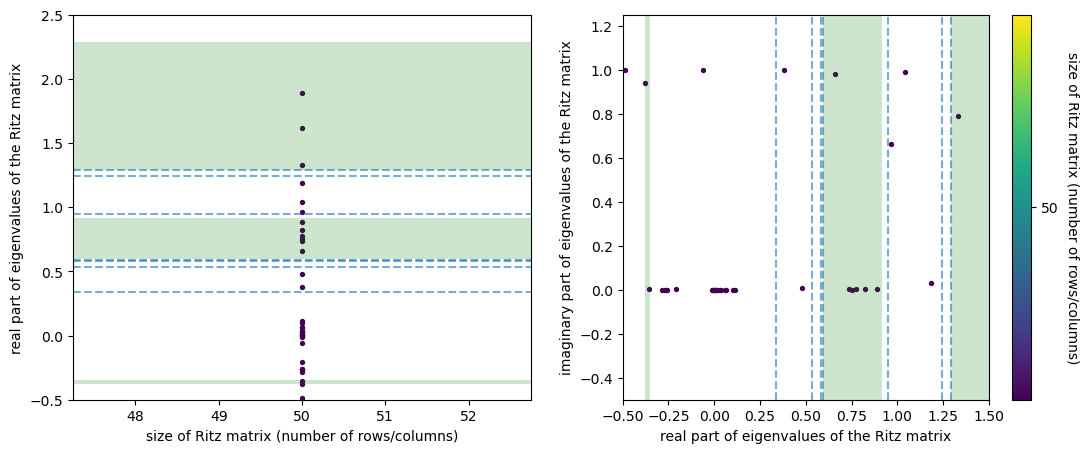

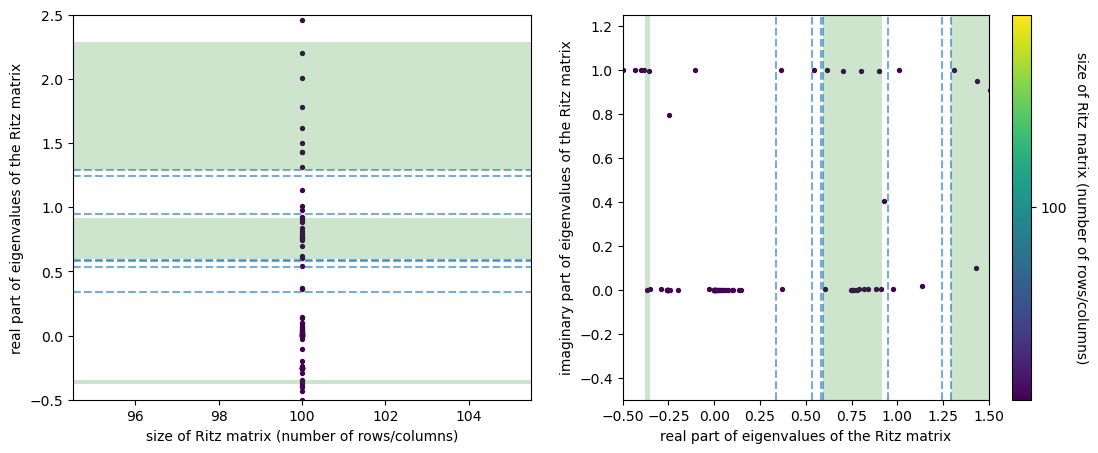

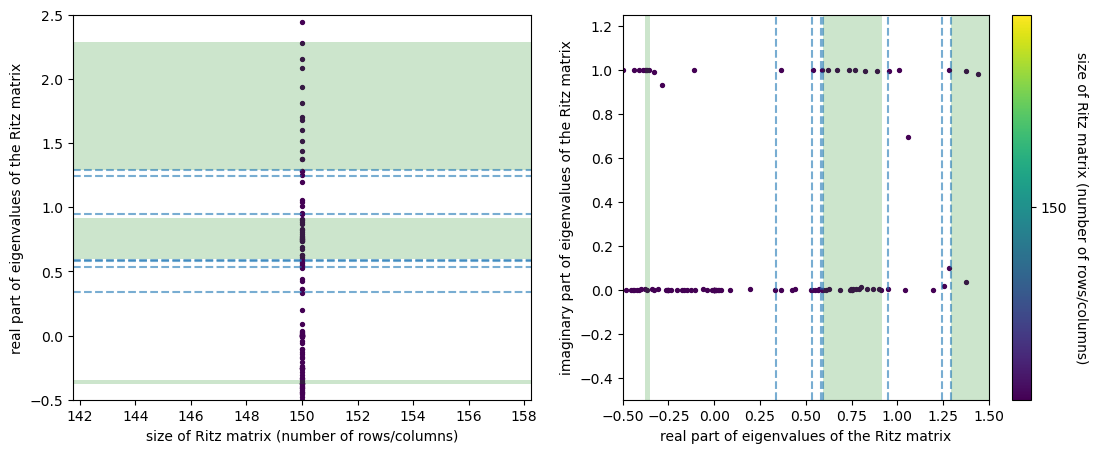

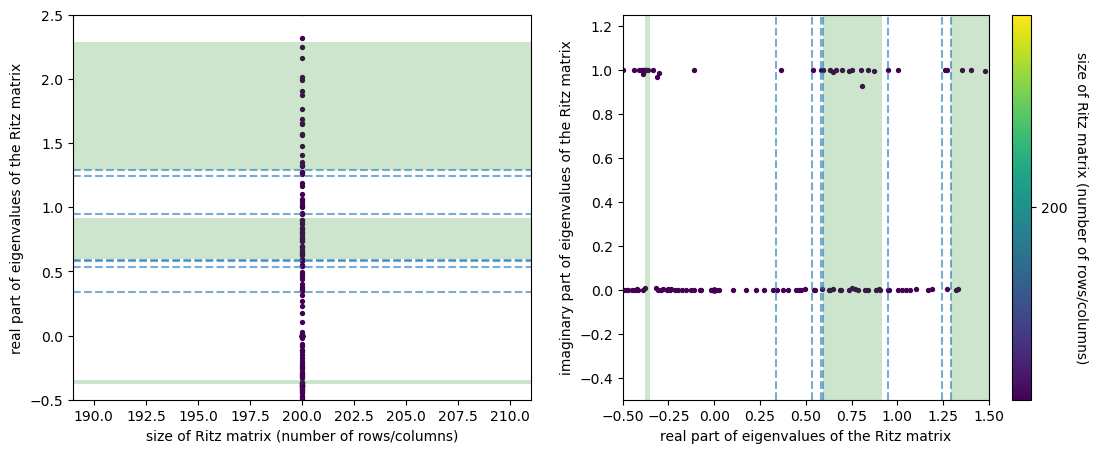

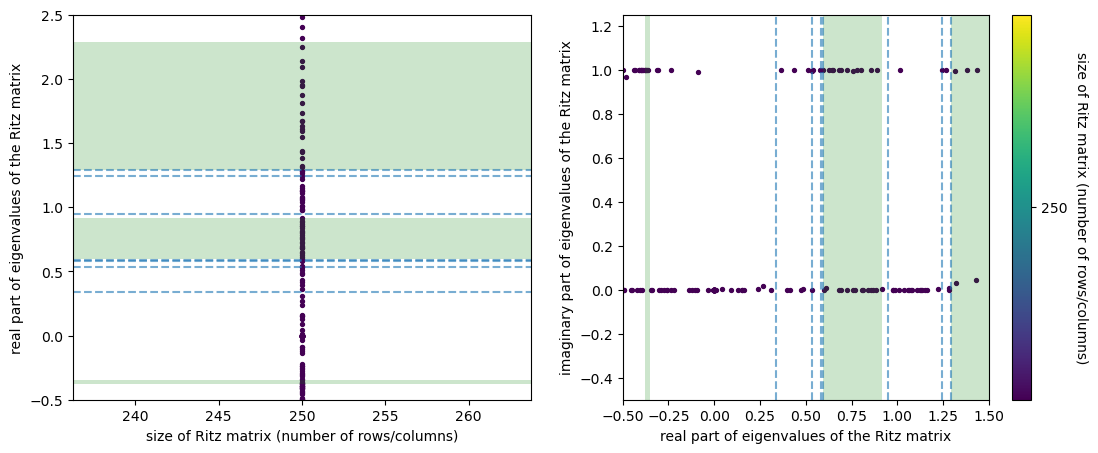

In [6]:
plot(rusl_dbm)
plot(rusl_dbm, dbm=0.95)
for i in rusl_dbm:
    plot({i: rusl_dbm[i]})